<a href="https://colab.research.google.com/github/andresacosta87/NDVI-sentinel/blob/master/SPACEAG_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SPACE AG CHALLENGE. 
En este notebook se realizarán las actividades sugeridas por el desafio de SpaceAG para el cargo de Data Analyst. Las tareas ejecutadas a continuación parten de la instancia creada en la APP Sentinel Hub con habilitación de script para python. 

Las actividades realizadas se han dividido en etapas para su mejor compresión destacando que todo el proceso se realizó en google Colab.  

Realizado por Andrés Acosta 

## ETAPA 1: Instalación de dependencias y importación de archivos json
Se ocuparán las librerías de eo-learn la cual facilita la captura de datos de los satelitales por medio de scripts en python. La libreria eo-learn-io es la encargada de realizar la captura de datos del servicio de Sentinel Hub. 

In [2]:
!pip install eo-learn


In [3]:
!pip install overpass

Acá crearé un link simbolico con mi google drive para la importación de archivos 

In [4]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive/')

/
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [5]:
!ln -s "/content/gdrive/My Drive" "/mydrive"

!ls /mydrive

 backup			   'Colab Notebooks'   map.geojson      yolov3
 chi_pred_ClienteItem.csv   data.csv	       sentinelhub-py


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os

from matplotlib import dates
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Polygon, box, shape, mapping
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import overpass

In [0]:
from pathlib import Path

data_dir= Path('mydrive/sentinelhub-py/')

In [0]:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, Dependency, FeatureType, CompositeTask
from eolearn.io import S2L1CWCSInput, L8L1CWCSInput, DEMWCSInput, AddGeopediaFeature, ExportToTiff
from eolearn.io.sentinelhub_service import S1IWWCSInput
from eolearn.geometry import VectorToRaster
from sentinelhub import BBoxSplitter, BBox, CRS, DataSource

Dado que se ha facilitado el archivo JSON con la información del área a estudiar, se utilizara geopandas para su captura y visualización para conocer el datum del archivo.

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

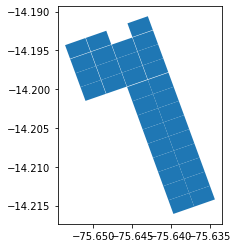

In [10]:
farm_filename='/mydrive/sentinelhub-py/map.geojson'
farm = gpd.read_file(str(farm_filename))
farm.plot()
farm.crs

Resulta conveniente trabajar en coordenadas UTM, por lo que emplearé el módulo CRS de la libreria Sentinel Hub para exportar a UTM 18S (zona que correspondería al área de estudio)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 78°W to 72°W - by country
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

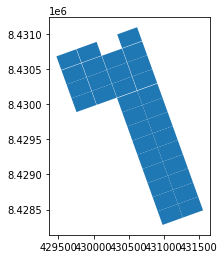

In [11]:
farm_crs = CRS.UTM_18S
farm = farm.to_crs(crs={'init':CRS.ogc_string(farm_crs)})
farm.plot()
farm.crs

## ETAPA 2: Preparación de datos
En esta etapa se trabajara con los poligonos contenido del dataset los que definen al lote del campo. En particular se pueden leer todos los poligonos y extraer las dimensiones de todo el campo o bien extraer los poligones de cada lote y trabajarlos por separado. Sin embargo, se solicita analizar cada lote por separado por lo que se obtendrán los poligonos de cada lote.

In [0]:
farm.shape

(33, 3)

In [0]:
#Tenemos 33 lotes en el archivo farm
farm_shape1 = farm.geometry.values[-1]
farm_shape2 = farm.geometry.values[0]
farm_shape3 = farm.geometry.values[1]
farm_shape4 = farm.geometry.values[2]
farm_shape5 = farm.geometry.values[3]
farm_shape6 = farm.geometry.values[4]
farm_shape7 = farm.geometry.values[5]
farm_shape8 = farm.geometry.values[6]
farm_shape9 = farm.geometry.values[7]
farm_shape10 = farm.geometry.values[8]
farm_shape11 = farm.geometry.values[9]
farm_shape12 = farm.geometry.values[10]
farm_shape13 = farm.geometry.values[11]
farm_shape14 = farm.geometry.values[12]
farm_shape15 = farm.geometry.values[13]
farm_shape16 = farm.geometry.values[14]
farm_shape17 = farm.geometry.values[15]
farm_shape18 = farm.geometry.values[16]
farm_shape19 = farm.geometry.values[17]
farm_shape20 = farm.geometry.values[18]
farm_shape21 = farm.geometry.values[19]
farm_shape22 = farm.geometry.values[20]
farm_shape23 = farm.geometry.values[21]
farm_shape24 = farm.geometry.values[22]
farm_shape25 = farm.geometry.values[23]
farm_shape26 = farm.geometry.values[24]
farm_shape27 = farm.geometry.values[25]
farm_shape28 = farm.geometry.values[26]
farm_shape29 = farm.geometry.values[27]
farm_shape30 = farm.geometry.values[28]
farm_shape31 = farm.geometry.values[29]
farm_shape32 = farm.geometry.values[30]
farm_shape33 = farm.geometry.values[31]


Cada lote tendra definido recuadros (bbox) que permitiran obtener las imágenes para cada lote, por tanto se definirán 33 bbox como sigue:

In [0]:
bbox_splitter1 = BBoxSplitter([farm_shape1], farm_crs, (1,1))
bbox_splitter2 = BBoxSplitter([farm_shape2], farm_crs, (1,1))
bbox_splitter3 = BBoxSplitter([farm_shape3], farm_crs, (1,1))
bbox_splitter4 = BBoxSplitter([farm_shape4], farm_crs, (1,1))
bbox_splitter5 = BBoxSplitter([farm_shape5], farm_crs, (1,1))
bbox_splitter6 = BBoxSplitter([farm_shape6], farm_crs, (1,1))
bbox_splitter7 = BBoxSplitter([farm_shape7], farm_crs, (1,1))
bbox_splitter8 = BBoxSplitter([farm_shape8], farm_crs, (1,1))
bbox_splitter9 = BBoxSplitter([farm_shape9], farm_crs, (1,1))
bbox_splitter10 = BBoxSplitter([farm_shape10], farm_crs, (1,1))
bbox_splitter11 = BBoxSplitter([farm_shape11], farm_crs, (1,1))
bbox_splitter12 = BBoxSplitter([farm_shape12], farm_crs, (1,1))
bbox_splitter13 = BBoxSplitter([farm_shape13], farm_crs, (1,1))
bbox_splitter14 = BBoxSplitter([farm_shape14], farm_crs, (1,1))
bbox_splitter15= BBoxSplitter([farm_shape15], farm_crs, (1,1))
bbox_splitter16 = BBoxSplitter([farm_shape16], farm_crs, (1,1))
bbox_splitter17 = BBoxSplitter([farm_shape17], farm_crs, (1,1))
bbox_splitter18 = BBoxSplitter([farm_shape18], farm_crs, (1,1))
bbox_splitter19 = BBoxSplitter([farm_shape19], farm_crs, (1,1))
bbox_splitter20 = BBoxSplitter([farm_shape20], farm_crs, (1,1))
bbox_splitter21 = BBoxSplitter([farm_shape21], farm_crs, (1,1))
bbox_splitter22 = BBoxSplitter([farm_shape22], farm_crs, (1,1))
bbox_splitter23 = BBoxSplitter([farm_shape23], farm_crs, (1,1))
bbox_splitter24 = BBoxSplitter([farm_shape24], farm_crs, (1,1))
bbox_splitter25 = BBoxSplitter([farm_shape25], farm_crs, (1,1))
bbox_splitter26 = BBoxSplitter([farm_shape26], farm_crs, (1,1))
bbox_splitter27 = BBoxSplitter([farm_shape27], farm_crs, (1,1))
bbox_splitter28 = BBoxSplitter([farm_shape28], farm_crs, (1,1))
bbox_splitter29 = BBoxSplitter([farm_shape29], farm_crs, (1,1))
bbox_splitter30 = BBoxSplitter([farm_shape30], farm_crs, (1,1))
bbox_splitter31 = BBoxSplitter([farm_shape31], farm_crs, (1,1))
bbox_splitter32 = BBoxSplitter([farm_shape32], farm_crs, (1,1))
bbox_splitter33 = BBoxSplitter([farm_shape33], farm_crs, (1,1))

Ahora creare un dataframe tanto en pandas como en geopandas con la información de los poligonos juntos con sus bounds, los que serán utilizados para la etapa 3 (obtención de imagenes)

In [14]:
geometry1 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter1.bbox_list]
idxs_x = [info['index_x'] for info in bbox_splitter1.info_list]
idxs_y1 = [info['index_y'] for info in bbox_splitter1.info_list]

df1 = pd.DataFrame({'index_x':idxs_x, 'index_y1':idxs_y1})
gdf1 = gpd.GeoDataFrame(df1, crs={'init':CRS.ogc_string(bbox_splitter1.bbox_list[0].crs)}, geometry=geometry1)

geometry2 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter2.bbox_list]
idxs_x2 = [info['index_x'] for info in bbox_splitter2.info_list]
idxs_y2 = [info['index_y'] for info in bbox_splitter2.info_list]

df2 = pd.DataFrame({'index_x':idxs_x2, 'index_y2':idxs_y2})
gdf2 = gpd.GeoDataFrame(df2, crs={'init':CRS.ogc_string(bbox_splitter2.bbox_list[0].crs)}, geometry=geometry2)

geometry3 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter3.bbox_list]
idxs_x3 = [info['index_x'] for info in bbox_splitter3.info_list]
idxs_y3 = [info['index_y'] for info in bbox_splitter3.info_list]

df3 = pd.DataFrame({'index_x3':idxs_x3, 'index_y3':idxs_y3})
gdf3 = gpd.GeoDataFrame(df3, crs={'init':CRS.ogc_string(bbox_splitter3.bbox_list[0].crs)}, geometry=geometry3)

geometry4 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter4.bbox_list]
idxs_x4 = [info['index_x'] for info in bbox_splitter4.info_list]
idxs_y4 = [info['index_y'] for info in bbox_splitter4.info_list]

df4 = pd.DataFrame({'index_x4':idxs_x4, 'index_y4':idxs_y4})
gdf4 = gpd.GeoDataFrame(df4, crs={'init':CRS.ogc_string(bbox_splitter4.bbox_list[0].crs)}, geometry=geometry4)

geometry5 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter5.bbox_list]
idxs_x5 = [info['index_x'] for info in bbox_splitter5.info_list]
idxs_y5 = [info['index_y'] for info in bbox_splitter5.info_list]

df5 = pd.DataFrame({'index_x5':idxs_x5, 'index_y5':idxs_y5})
gdf5 = gpd.GeoDataFrame(df5, crs={'init':CRS.ogc_string(bbox_splitter5.bbox_list[0].crs)}, geometry=geometry5)

geometry6 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter6.bbox_list]
idxs_x6 = [info['index_x'] for info in bbox_splitter6.info_list]
idxs_y6 = [info['index_y'] for info in bbox_splitter6.info_list]

df6 = pd.DataFrame({'index_x6':idxs_x6, 'index_y6':idxs_y6})
gdf6 = gpd.GeoDataFrame(df6, crs={'init':CRS.ogc_string(bbox_splitter6.bbox_list[0].crs)}, geometry=geometry6)

geometry7 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter7.bbox_list]
idxs_x7 = [info['index_x'] for info in bbox_splitter7.info_list]
idxs_y7 = [info['index_y'] for info in bbox_splitter7.info_list]

df7 = pd.DataFrame({'index_x7':idxs_x7, 'index_y7':idxs_y7})
gdf7 = gpd.GeoDataFrame(df7, crs={'init':CRS.ogc_string(bbox_splitter7.bbox_list[0].crs)}, geometry=geometry7)

geometry8 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter8.bbox_list]
idxs_x8 = [info['index_x'] for info in bbox_splitter8.info_list]
idxs_y8 = [info['index_y'] for info in bbox_splitter8.info_list]

df8 = pd.DataFrame({'index_x8':idxs_x8, 'index_y8':idxs_y8})
gdf8 = gpd.GeoDataFrame(df8, crs={'init':CRS.ogc_string(bbox_splitter8.bbox_list[0].crs)}, geometry=geometry8)

geometry9 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter9.bbox_list]
idxs_x9 = [info['index_x'] for info in bbox_splitter9.info_list]
idxs_y9 = [info['index_y'] for info in bbox_splitter9.info_list]

df9 = pd.DataFrame({'index_x9':idxs_x9, 'index_y9':idxs_y9})
gdf9 = gpd.GeoDataFrame(df9, crs={'init':CRS.ogc_string(bbox_splitter9.bbox_list[0].crs)}, geometry=geometry9)

geometry10 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter10.bbox_list]
idxs_x0 = [info['index_x'] for info in bbox_splitter10.info_list]
idxs_y10 = [info['index_y'] for info in bbox_splitter10.info_list]

df10 = pd.DataFrame({'index_x0':idxs_x0, 'index_y10':idxs_y10})
gdf10 = gpd.GeoDataFrame(df10, crs={'init':CRS.ogc_string(bbox_splitter10.bbox_list[0].crs)}, geometry=geometry10)

geometry11 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter11.bbox_list]
idxs_x1 = [info['index_x'] for info in bbox_splitter11.info_list]
idxs_y11 = [info['index_y'] for info in bbox_splitter11.info_list]

df11 = pd.DataFrame({'index_x1':idxs_x1, 'index_y11':idxs_y11})
gdf11 = gpd.GeoDataFrame(df11, crs={'init':CRS.ogc_string(bbox_splitter11.bbox_list[0].crs)}, geometry=geometry11)

geometry12 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter12.bbox_list]
idxs_x2 = [info['index_x'] for info in bbox_splitter12.info_list]
idxs_y12 = [info['index_y'] for info in bbox_splitter12.info_list]

df12 = pd.DataFrame({'index_x2':idxs_x2, 'index_y12':idxs_y12})
gdf12 = gpd.GeoDataFrame(df12, crs={'init':CRS.ogc_string(bbox_splitter12.bbox_list[0].crs)}, geometry=geometry12)

geometry13 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter13.bbox_list]
idxs_x3 = [info['index_x'] for info in bbox_splitter13.info_list]
idxs_y13 = [info['index_y'] for info in bbox_splitter13.info_list]

df13 = pd.DataFrame({'index_x3':idxs_x3, 'index_y13':idxs_y13})
gdf13 = gpd.GeoDataFrame(df13, crs={'init':CRS.ogc_string(bbox_splitter13.bbox_list[0].crs)}, geometry=geometry13)

geometry14 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter14.bbox_list]
idxs_x4 = [info['index_x'] for info in bbox_splitter14.info_list]
idxs_y14 = [info['index_y'] for info in bbox_splitter14.info_list]

df14 = pd.DataFrame({'index_x4':idxs_x4, 'index_y14':idxs_y14})
gdf14 = gpd.GeoDataFrame(df14, crs={'init':CRS.ogc_string(bbox_splitter14.bbox_list[0].crs)}, geometry=geometry14)

geometry15 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter15.bbox_list]
idxs_x5 = [info['index_x'] for info in bbox_splitter15.info_list]
idxs_y15 = [info['index_y'] for info in bbox_splitter15.info_list]

df15 = pd.DataFrame({'index_x5':idxs_x5, 'index_y15':idxs_y15})
gdf15 = gpd.GeoDataFrame(df15, crs={'init':CRS.ogc_string(bbox_splitter15.bbox_list[0].crs)}, geometry=geometry15)


geometry16 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter16.bbox_list]
idxs_x6 = [info['index_x'] for info in bbox_splitter16.info_list]
idxs_y16 = [info['index_y'] for info in bbox_splitter16.info_list]

df16 = pd.DataFrame({'index_x6':idxs_x6, 'index_y16':idxs_y16})
gdf16 = gpd.GeoDataFrame(df16, crs={'init':CRS.ogc_string(bbox_splitter16.bbox_list[0].crs)}, geometry=geometry16)

geometry17 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter17.bbox_list]
idxs_x7 = [info['index_x'] for info in bbox_splitter17.info_list]
idxs_y17 = [info['index_y'] for info in bbox_splitter17.info_list]

df17 = pd.DataFrame({'index_x7':idxs_x7, 'index_y17':idxs_y17})
gdf17 = gpd.GeoDataFrame(df17, crs={'init':CRS.ogc_string(bbox_splitter17.bbox_list[0].crs)}, geometry=geometry17)

geometry18 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter1.bbox_list]
idxs_x = [info['index_x'] for info in bbox_splitter1.info_list]
idxs_y18 = [info['index_y'] for info in bbox_splitter1.info_list]

df18 = pd.DataFrame({'index_x8':idxs_x8, 'index_y18':idxs_y18})
gdf18 = gpd.GeoDataFrame(df18, crs={'init':CRS.ogc_string(bbox_splitter18.bbox_list[0].crs)}, geometry=geometry18)


geometry19 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter19.bbox_list]
idxs_x9 = [info['index_x'] for info in bbox_splitter19.info_list]
idxs_y19 = [info['index_y'] for info in bbox_splitter19.info_list]

df19 = pd.DataFrame({'index_x9':idxs_x9, 'index_y19':idxs_y19})
gdf19 = gpd.GeoDataFrame(df19, crs={'init':CRS.ogc_string(bbox_splitter19.bbox_list[0].crs)}, geometry=geometry19)


geometry20 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter20.bbox_list]
idxs_x20 = [info['index_x'] for info in bbox_splitter20.info_list]
idxs_y20 = [info['index_y'] for info in bbox_splitter20.info_list]

df20 = pd.DataFrame({'index_x20':idxs_x20, 'index_y20':idxs_y20})
gdf20 = gpd.GeoDataFrame(df20, crs={'init':CRS.ogc_string(bbox_splitter20.bbox_list[0].crs)}, geometry=geometry20)


geometry21 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter21.bbox_list]
idxs_x21 = [info['index_x'] for info in bbox_splitter21.info_list]
idxs_y21 = [info['index_y'] for info in bbox_splitter21.info_list]

df21 = pd.DataFrame({'index_x21':idxs_x21, 'index_y21':idxs_y21})
gdf21 = gpd.GeoDataFrame(df21, crs={'init':CRS.ogc_string(bbox_splitter21.bbox_list[0].crs)}, geometry=geometry21)

geometry22 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter22.bbox_list]
idxs_x22 = [info['index_x'] for info in bbox_splitter22.info_list]
idxs_y22 = [info['index_y'] for info in bbox_splitter22.info_list]

df22 = pd.DataFrame({'index_x22':idxs_x22, 'index_y22':idxs_y22})
gdf22 = gpd.GeoDataFrame(df22, crs={'init':CRS.ogc_string(bbox_splitter22.bbox_list[0].crs)}, geometry=geometry22)

geometry23 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter23.bbox_list]
idxs_x23 = [info['index_x'] for info in bbox_splitter23.info_list]
idxs_y23 = [info['index_y'] for info in bbox_splitter23.info_list]

df23 = pd.DataFrame({'index_x23':idxs_x23, 'index_y23':idxs_y23})
gdf23 = gpd.GeoDataFrame(df23, crs={'init':CRS.ogc_string(bbox_splitter23.bbox_list[0].crs)}, geometry=geometry23)


geometry24 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter24.bbox_list]
idxs_x24 = [info['index_x'] for info in bbox_splitter24.info_list]
idxs_y24 = [info['index_y'] for info in bbox_splitter24.info_list]

df24 = pd.DataFrame({'index_x24':idxs_x24, 'index_y24':idxs_y24})
gdf24 = gpd.GeoDataFrame(df24, crs={'init':CRS.ogc_string(bbox_splitter24.bbox_list[0].crs)}, geometry=geometry24)


geometry25 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter25.bbox_list]
idxs_x25 = [info['index_x'] for info in bbox_splitter25.info_list]
idxs_y25 = [info['index_y'] for info in bbox_splitter25.info_list]

df25 = pd.DataFrame({'index_x25':idxs_x25, 'index_y25':idxs_y25})
gdf25 = gpd.GeoDataFrame(df25, crs={'init':CRS.ogc_string(bbox_splitter25.bbox_list[0].crs)}, geometry=geometry25)

geometry26 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter26.bbox_list]
idxs_x26 = [info['index_x'] for info in bbox_splitter26.info_list]
idxs_y26 = [info['index_y'] for info in bbox_splitter26.info_list]

df26 = pd.DataFrame({'index_x26':idxs_x26, 'index_y26':idxs_y26})
gdf26 = gpd.GeoDataFrame(df26, crs={'init':CRS.ogc_string(bbox_splitter26.bbox_list[0].crs)}, geometry=geometry26)

geometry27 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter27.bbox_list]
idxs_x27 = [info['index_x'] for info in bbox_splitter27.info_list]
idxs_y27 = [info['index_y'] for info in bbox_splitter27.info_list]

df27 = pd.DataFrame({'index_x27':idxs_x27, 'index_y27':idxs_y27})
gdf27 = gpd.GeoDataFrame(df27, crs={'init':CRS.ogc_string(bbox_splitter27.bbox_list[0].crs)}, geometry=geometry27)

geometry28 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter28.bbox_list]
idxs_x28 = [info['index_x'] for info in bbox_splitter28.info_list]
idxs_y28 = [info['index_y'] for info in bbox_splitter28.info_list]

df28 = pd.DataFrame({'index_x28':idxs_x28, 'index_y28':idxs_y28})
gdf28 = gpd.GeoDataFrame(df28, crs={'init':CRS.ogc_string(bbox_splitter28.bbox_list[0].crs)}, geometry=geometry28)

geometry29 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter29.bbox_list]
idxs_x29 = [info['index_x'] for info in bbox_splitter29.info_list]
idxs_y29 = [info['index_y'] for info in bbox_splitter29.info_list]

df29 = pd.DataFrame({'index_x29':idxs_x29, 'index_y29':idxs_y29})
gdf29 = gpd.GeoDataFrame(df29, crs={'init':CRS.ogc_string(bbox_splitter29.bbox_list[0].crs)}, geometry=geometry29)

geometry30 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter30.bbox_list]
idxs_x30 = [info['index_x'] for info in bbox_splitter30.info_list]
idxs_y30 = [info['index_y'] for info in bbox_splitter30.info_list]

df30 = pd.DataFrame({'index_x30':idxs_x30, 'index_y30':idxs_y30})
gdf30 = gpd.GeoDataFrame(df30, crs={'init':CRS.ogc_string(bbox_splitter30.bbox_list[0].crs)}, geometry=geometry30)

geometry31 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter31.bbox_list]
idxs_x31 = [info['index_x'] for info in bbox_splitter31.info_list]
idxs_y31 = [info['index_y'] for info in bbox_splitter31.info_list]

df31 = pd.DataFrame({'index_x31':idxs_x31, 'index_y31':idxs_y31})
gdf31 = gpd.GeoDataFrame(df31, crs={'init':CRS.ogc_string(bbox_splitter31.bbox_list[0].crs)}, geometry=geometry31)

geometry32 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter32.bbox_list]
idxs_x32 = [info['index_x'] for info in bbox_splitter32.info_list]
idxs_y32 = [info['index_y'] for info in bbox_splitter32.info_list]

df32 = pd.DataFrame({'index_x32':idxs_x32, 'index_y32':idxs_y32})
gdf32 = gpd.GeoDataFrame(df32, crs={'init':CRS.ogc_string(bbox_splitter32.bbox_list[0].crs)}, geometry=geometry32)

geometry33 = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter33.bbox_list]
idxs_x33 = [info['index_x'] for info in bbox_splitter33.info_list]
idxs_y33 = [info['index_y'] for info in bbox_splitter33.info_list]

df33 = pd.DataFrame({'index_x33':idxs_x33, 'index_y33':idxs_y33})
gdf33 = gpd.GeoDataFrame(df33, crs={'init':CRS.ogc_string(bbox_splitter33.bbox_list[0].crs)}, geometry=geometry33)





/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Visualicemos uno de los bbox para verificar (para visualizar cada uno solo basta con cambiar en la línea 2 en gdf por el número del lote que se quiere ver)

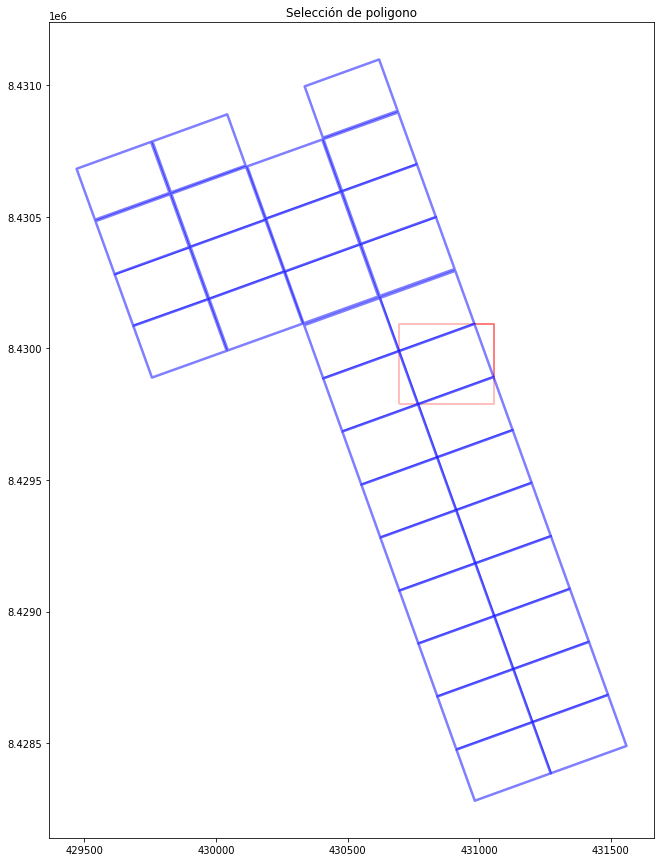

In [16]:
fig, ax = plt.subplots(figsize=(15,15))
gdf4.plot(ax=ax, facecolor='w', edgecolor='r', alpha=0.5, linewidth=2)
farm.plot(ax=ax, facecolor='w', edgecolor='b', alpha=0.5, linewidth=2.5)
ax.set_title('Selección de poligono');


## ETAPA 3: Captura de datos satelitales del sentinel HUB
Para esta etapa se requiere tener el instance_id en la APP del sentinel HUB con la habilitación del template para python. En particular se extraera la capa True Color con la finalidad de verificar la ubicación del lote respecto a las coordenadas y luego los valores NDVI. Así mismo se extraera las imágenes en el intervalo de tiempo indicado en SentinelHubImage-available_dates.xlxs

In [0]:
#Se debe indicar el instance_id en ''
s2_l1c_rgb = S2L1CWCSInput('TRUE-COLOR-S2-L1C', resx='1m', resy='1m', maxcc=0.1, instance_id='c73f37f3-088c-450f-a188-b0dfa1a84fec')
s2_l1c_ndvi = S2L1CWCSInput('NDVI', resx='1m', resy='1m', maxcc=0.1,instance_id='c73f37f3-088c-450f-a188-b0dfa1a84fec')

In [18]:
time_interval = ['2016-07-15','2020-04-20']
idx = 0
bbox1 = bbox_splitter1.bbox_list[idx]
bbox2 = bbox_splitter2.bbox_list[idx]
bbox3 = bbox_splitter3.bbox_list[idx]
bbox4 = bbox_splitter4.bbox_list[idx]
bbox5 = bbox_splitter5.bbox_list[idx]
bbox6 = bbox_splitter6.bbox_list[idx]
bbox7 = bbox_splitter7.bbox_list[idx]
bbox8 = bbox_splitter8.bbox_list[idx]
bbox9 = bbox_splitter9.bbox_list[idx]
bbox10 = bbox_splitter10.bbox_list[idx]
bbox11 = bbox_splitter11.bbox_list[idx]
bbox12 = bbox_splitter12.bbox_list[idx]
bbox13 = bbox_splitter13.bbox_list[idx]
bbox14 = bbox_splitter14.bbox_list[idx]
bbox15 = bbox_splitter15.bbox_list[idx]
bbox16 = bbox_splitter16.bbox_list[idx]
bbox17 = bbox_splitter17.bbox_list[idx]
bbox18 = bbox_splitter18.bbox_list[idx]
bbox19 = bbox_splitter19.bbox_list[idx]
bbox20 = bbox_splitter20.bbox_list[idx]
bbox21 = bbox_splitter21.bbox_list[idx]
bbox22 = bbox_splitter22.bbox_list[idx]
bbox23 = bbox_splitter23.bbox_list[idx]
bbox24 = bbox_splitter24.bbox_list[idx]
bbox25 = bbox_splitter25.bbox_list[idx]
bbox26 = bbox_splitter26.bbox_list[idx]
bbox27 = bbox_splitter27.bbox_list[idx]
bbox28 = bbox_splitter28.bbox_list[idx]
bbox29 = bbox_splitter29.bbox_list[idx]
bbox30 = bbox_splitter30.bbox_list[idx]
bbox31 = bbox_splitter31.bbox_list[idx]
bbox32 = bbox_splitter32.bbox_list[idx]
bbox33 = bbox_splitter33.bbox_list[idx]

## Lote 1
eop1_s2 = s2_l1c_rgb.execute(bbox=bbox1, time_interval=time_interval)
eop1_s2 = s2_l1c_ndvi.execute(eop1_s2)

## Lote 2
eop2_s2 = s2_l1c_rgb.execute(bbox=bbox2, time_interval=time_interval)
eop2_s2 = s2_l1c_ndvi.execute(eop2_s2)

## Lote 3
eop3_s2 = s2_l1c_rgb.execute(bbox=bbox3, time_interval=time_interval)
eop3_s2 = s2_l1c_ndvi.execute(eop3_s2)






/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


In [19]:
## Lote 4
eop4_s2 = s2_l1c_rgb.execute(bbox=bbox4, time_interval=time_interval)
eop4_s2 = s2_l1c_ndvi.execute(eop4_s2)

## Lote 5
eop5_s2 = s2_l1c_rgb.execute(bbox=bbox5, time_interval=time_interval)
eop5_s2 = s2_l1c_ndvi.execute(eop5_s2)

## Lote 6
eop6_s2 = s2_l1c_rgb.execute(bbox=bbox6, time_interval=time_interval)
eop6_s2 = s2_l1c_ndvi.execute(eop6_s2)

/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


In [20]:
## Lote 7
eop7_s2 = s2_l1c_rgb.execute(bbox=bbox7, time_interval=time_interval)
eop7_s2 = s2_l1c_ndvi.execute(eop7_s2)

## Lote 8
eop8_s2 = s2_l1c_rgb.execute(bbox=bbox8, time_interval=time_interval)
eop8_s2 = s2_l1c_ndvi.execute(eop8_s2)

## Lote 9
eop9_s2 = s2_l1c_rgb.execute(bbox=bbox9, time_interval=time_interval)
eop9_s2 = s2_l1c_ndvi.execute(eop9_s2)

## Lote 10
eop10_s2 = s2_l1c_rgb.execute(bbox=bbox10, time_interval=time_interval)
eop10_s2 = s2_l1c_ndvi.execute(eop10_s2)


/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


In [21]:
## Lote 11
eop11_s2 = s2_l1c_rgb.execute(bbox=bbox11, time_interval=time_interval)
eop11_s2 = s2_l1c_ndvi.execute(eop11_s2)

## Lote 12
eop12_s2 = s2_l1c_rgb.execute(bbox=bbox12, time_interval=time_interval)
eop12_s2 = s2_l1c_ndvi.execute(eop12_s2)

## Lote 13
eop13_s2 = s2_l1c_rgb.execute(bbox=bbox13, time_interval=time_interval)
eop13_s2 = s2_l1c_ndvi.execute(eop13_s2)



/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


In [22]:
## Lote 14
eop14_s2 = s2_l1c_rgb.execute(bbox=bbox14, time_interval=time_interval)
eop14_s2 = s2_l1c_ndvi.execute(eop14_s2)

## Lote 15
eop15_s2 = s2_l1c_rgb.execute(bbox=bbox15, time_interval=time_interval)
eop15_s2 = s2_l1c_ndvi.execute(eop15_s2)

## Lote 16
eop16_s2 = s2_l1c_rgb.execute(bbox=bbox16, time_interval=time_interval)
eop16_s2 = s2_l1c_ndvi.execute(eop16_s2)



/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


In [23]:
## Lote 17
eop17_s2 = s2_l1c_rgb.execute(bbox=bbox17, time_interval=time_interval)
eop17_s2 = s2_l1c_ndvi.execute(eop17_s2)

## Lote 18
eop18_s2 = s2_l1c_rgb.execute(bbox=bbox18, time_interval=time_interval)
eop18_s2 = s2_l1c_ndvi.execute(eop18_s2)

## Lote 19
eop19_s2 = s2_l1c_rgb.execute(bbox=bbox19, time_interval=time_interval)
eop19_s2 = s2_l1c_ndvi.execute(eop19_s2)



/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


In [24]:
## Lote 20
eop20_s2 = s2_l1c_rgb.execute(bbox=bbox20, time_interval=time_interval)
eop20_s2 = s2_l1c_ndvi.execute(eop20_s2)

## Lote 21
eop21_s2 = s2_l1c_rgb.execute(bbox=bbox21, time_interval=time_interval)
eop21_s2 = s2_l1c_ndvi.execute(eop21_s2)

## Lote 22
eop22_s2 = s2_l1c_rgb.execute(bbox=bbox22, time_interval=time_interval)
eop22_s2 = s2_l1c_ndvi.execute(eop22_s2)



/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


In [0]:
## Lote 23
eop23_s2 = s2_l1c_rgb.execute(bbox=bbox23, time_interval=time_interval)
eop23_s2 = s2_l1c_ndvi.execute(eop23_s2)

## Lote 24
eop24_s2 = s2_l1c_rgb.execute(bbox=bbox24, time_interval=time_interval)
eop24_s2 = s2_l1c_ndvi.execute(eop24_s2)

## Lote 25
eop25_s2 = s2_l1c_rgb.execute(bbox=bbox25, time_interval=time_interval)
eop25_s2 = s2_l1c_ndvi.execute(eop25_s2)



/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


In [0]:
## Lote 26
eop26_s2 = s2_l1c_rgb.execute(bbox=bbox26, time_interval=time_interval)
eop26_s2 = s2_l1c_ndvi.execute(eop26_s2)

## Lote 27
eop27_s2 = s2_l1c_rgb.execute(bbox=bbox27, time_interval=time_interval)
eop27_s2 = s2_l1c_ndvi.execute(eop27_s2)

## Lote 28
eop28_s2 = s2_l1c_rgb.execute(bbox=bbox28, time_interval=time_interval)
eop28_s2 = s2_l1c_ndvi.execute(eop28_s2)



/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


In [0]:
## Lote 29
eop29_s2 = s2_l1c_rgb.execute(bbox=bbox29, time_interval=time_interval)
eop29_s2 = s2_l1c_ndvi.execute(eop29_s2)

## Lote 30
eop30_s2 = s2_l1c_rgb.execute(bbox=bbox30, time_interval=time_interval)
eop30_s2 = s2_l1c_ndvi.execute(eop30_s2)

## Lote 31
eop31_s2 = s2_l1c_rgb.execute(bbox=bbox31, time_interval=time_interval)
eop31_s2 = s2_l1c_ndvi.execute(eop31_s2)

## Lote 32
eop32_s2 = s2_l1c_rgb.execute(bbox=bbox32, time_interval=time_interval)
eop32_s2 = s2_l1c_ndvi.execute(eop32_s2)

## Lote 33
eop33_s2 = s2_l1c_rgb.execute(bbox=bbox33, time_interval=time_interval)
eop33_s2 = s2_l1c_ndvi.execute(eop33_s2)

/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


Las imágenes tanto RGB como NDVI para cada lote, se ha almacenado en eop[i]_s2 donde i=1,2,...33. Este archivo se guardaran .pickle para su posterior captura y análisis de la siguiente etapa. 

In [0]:


import pickle
with open('eop1_s2.pickle','wb') as a:
  pickle.dump(eop1_s2,a)

with open('eop2_s2.pickle','wb') as b:
  pickle.dump(eop2_s2,b)

with open('eop3_s2.pickle','wb') as c:
  pickle.dump(eop3_s2,c)


In [0]:
with open('eop4_s2.pickle','wb') as d:
  pickle.dump(eop4_s2,d)

with open('eop5_s2.pickle','wb') as e:
  pickle.dump(eop5_s2,e)

with open('eop6_s2.pickle','wb') as f:
  pickle.dump(eop6_s2,f)

with open('eop7_s2.pickle','wb') as g:
  pickle.dump(eop7_s2,g)

with open('eop8_s2.pickle','wb') as h:
  pickle.dump(eop8_s2,h)



In [0]:
with open('eop9_s2.pickle','wb') as i:
  pickle.dump(eop9_s2,i)

with open('eop10_s2.pickle','wb') as j:
  pickle.dump(eop10_s2,j)

with open('eop11_s2.pickle','wb') as k:
  pickle.dump(eop11_s2,k)

with open('eop12_s2.pickle','wb') as l:
  pickle.dump(eop12_s2,l)

with open('eop13_s2.pickle','wb') as m:
  pickle.dump(eop13_s2,m)



In [0]:
with open('eop14_s2.pickle','wb') as n:
  pickle.dump(eop14_s2,n)

with open('eop15_s2.pickle','wb') as o:
  pickle.dump(eop15_s2,o)

with open('eop16_s2.pickle','wb') as p:
  pickle.dump(eop16_s2,p)

with open('eop17_s2.pickle','wb') as q:
  pickle.dump(eop17_s2,q)



In [0]:
with open('eop18_s2.pickle','wb') as r:
  pickle.dump(eop18_s2,r)

with open('eop19_s2.pickle','wb') as s:
  pickle.dump(eop19_s2,s)

with open('eop20_s2.pickle','wb') as t:
  pickle.dump(eop20_s2,t)

with open('eop21_s2.pickle','wb') as u:
  pickle.dump(eop21_s2,u)

with open('eop22_s2.pickle','wb') as v:
  pickle.dump(eop22_s2,v)

with open('eop23_s2.pickle','wb') as x:
  pickle.dump(eop23_s2,x)

with open('eop24_s2.pickle','wb') as y:
  pickle.dump(eop24_s2,y)

with open('eop25_s2.pickle','wb') as z:
  pickle.dump(eop25_s2,z)



Veamos algunas de los lotes en RGB 

In [0]:
with open('eop26_s2.pickle','wb') as aa:
  pickle.dump(eop26_s2,aa)

with open('eop27_s2.pickle','wb') as bb:
  pickle.dump(eop27_s2,bb)

with open('eop28_s2.pickle','wb') as cc:
  pickle.dump(eop28_s2,cc)

with open('eop29_s2.pickle','wb') as dd:
  pickle.dump(eop29_s2,dd)

with open('eop30_s2.pickle','wb') as ee:
  pickle.dump(eop30_s2,ee)

with open('eop31_s2.pickle','wb') as ff:
  pickle.dump(eop31_s2,ff)

with open('eop32_s2.pickle','wb') as gg:
  pickle.dump(eop32_s2,gg)

with open('eop33_s2.pickle','wb') as hh:
  pickle.dump(eop33_s2,hh)

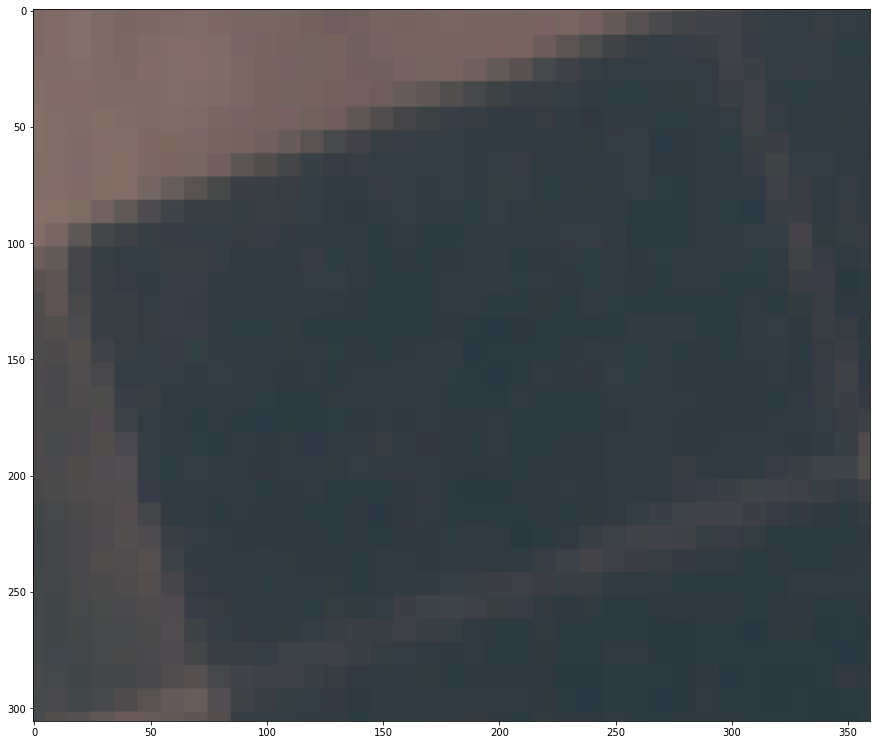

In [0]:
time_idx = 1
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(eop3_s2.data['TRUE-COLOR-S2-L1C'][time_idx])

Ahora lo mismo pero con NDVI

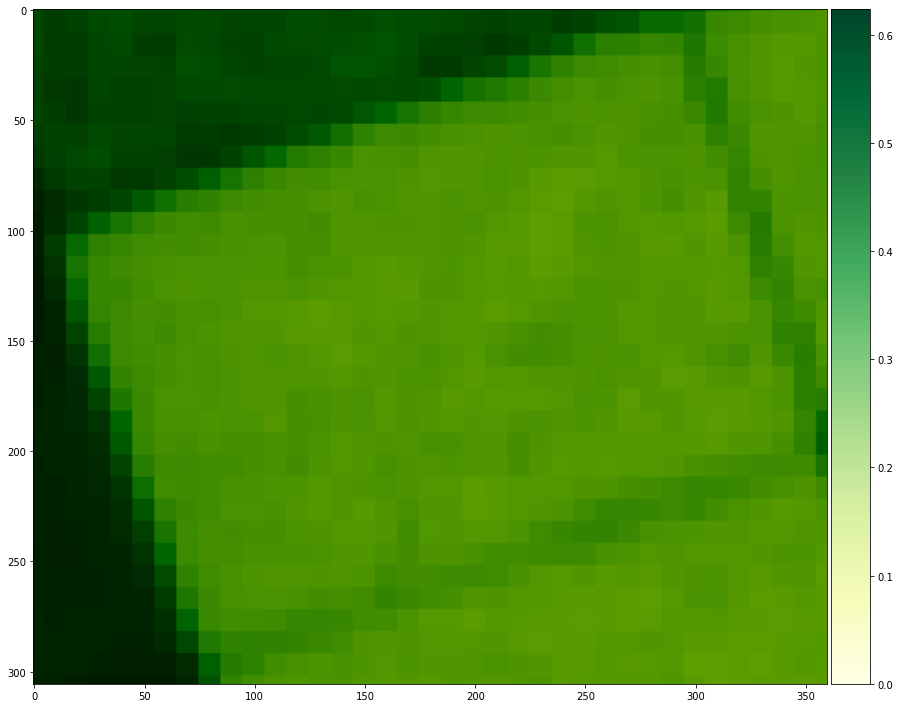

In [0]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(np.median(eop3_s2.data['NDVI'].squeeze(), axis=0), cmap=plt.cm.YlGn)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

Nótese la escala de NDVI a la izquierda de la imagen. 


##ETAPA 4. Análisis temporal 
En esta etapa se visualizara la evolución temporal para cada lote en función del NDVI como sigue


In [0]:
#Análisis temporal Lote 1
ndvi1=eop1_s2.data['NDVI']
mask=eop1_s2.mask['IS_DATA']
time=np.array(eop1_s2.timestamp)
t, w, h, _ = ndvi1.shape 

ndvi_clean = ndvi1.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi1.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

IndexError: ignored

In [0]:
#Análisis temporal Lote 2
ndvi2=eop2_s2.data['NDVI']
mask=eop2_s2.mask['IS_DATA']
time=np.array(eop2_s2.timestamp)
t, w, h, _ = ndvi2.shape 

ndvi_clean = ndvi2.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi2.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

IndexError: ignored

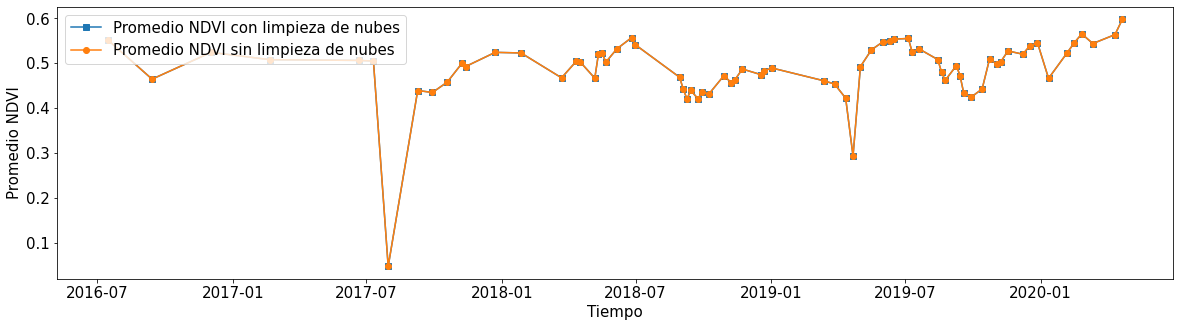

In [0]:
#Análisis temporal Lote 3
ndvi3=eop3_s2.data['NDVI']
mask=eop3_s2.mask['IS_DATA']
time=np.array(eop3_s2.timestamp)
t, w, h, _ = ndvi3.shape 

ndvi_clean = ndvi3.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi3.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc=2, prop={'size': 15});

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

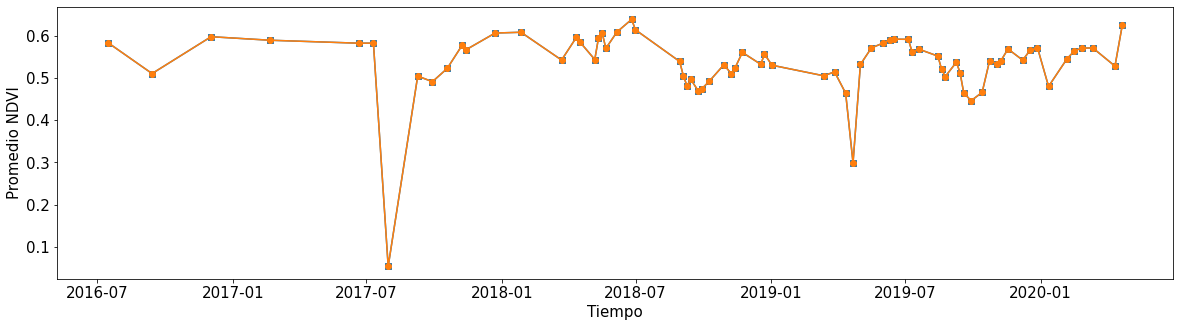

In [0]:

#Análisis temporal Lote 4
ndvi4=eop4_s2.data['NDVI']
mask=eop4_s2.mask['IS_DATA']
time=np.array(eop4_s2.timestamp)
t, w, h, _ = ndvi4.shape 

ndvi_clean = ndvi4.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi4.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

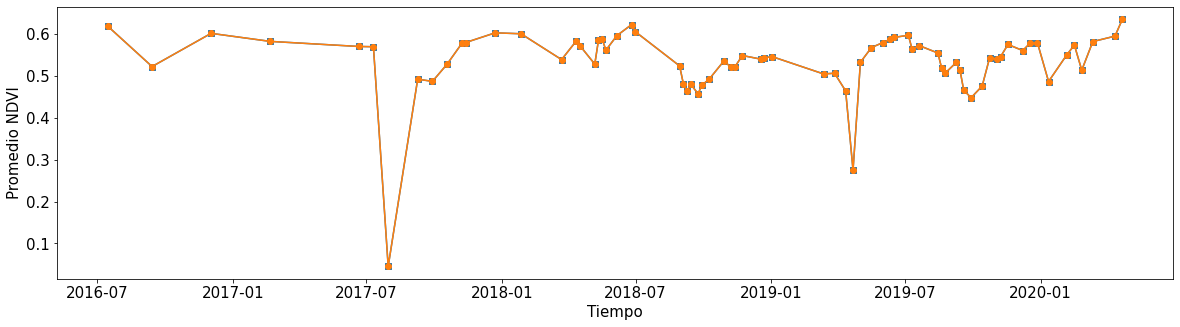

In [0]:
#Análisis temporal Lote 5
ndvi5=eop5_s2.data['NDVI']
mask=eop5_s2.mask['IS_DATA']
time=np.array(eop5_s2.timestamp)
t, w, h, _ = ndvi5.shape 

ndvi_clean = ndvi5.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi5.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

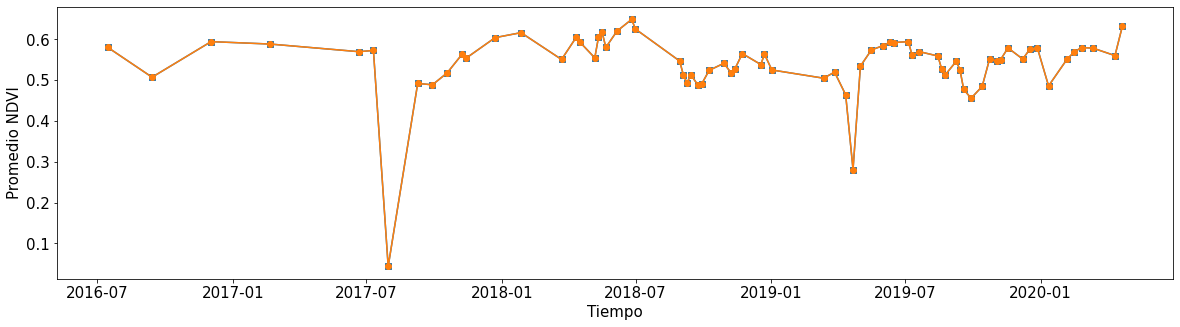

In [0]:
#Análisis temporal Lote 6
ndvi6=eop6_s2.data['NDVI']
mask=eop6_s2.mask['IS_DATA']
time=np.array(eop6_s2.timestamp)
t, w, h, _ = ndvi6.shape 

ndvi_clean = ndvi6.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi6.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

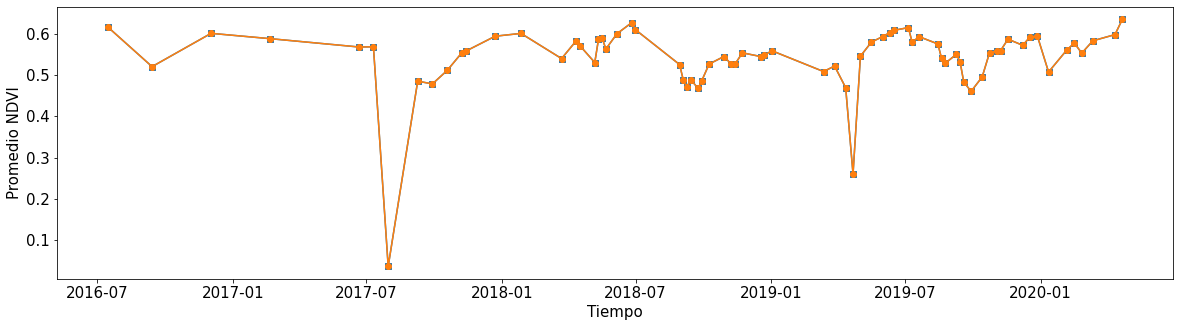

In [0]:
#Análisis temporal Lote 7
ndvi7=eop7_s2.data['NDVI']
mask=eop7_s2.mask['IS_DATA']
time=np.array(eop7_s2.timestamp)
t, w, h, _ = ndvi7.shape 

ndvi_clean = ndvi7.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi7.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

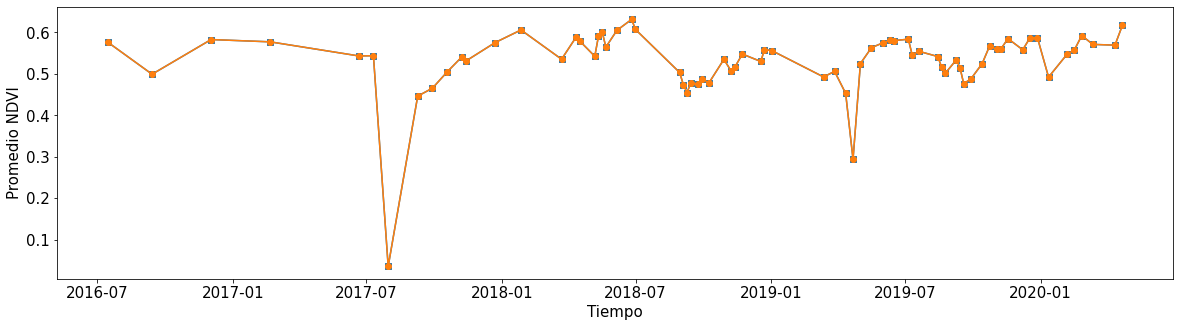

In [0]:
#Análisis temporal Lote 8
ndvi8=eop8_s2.data['NDVI']
mask=eop8_s2.mask['IS_DATA']
time=np.array(eop8_s2.timestamp)
t, w, h, _ = ndvi8.shape 

ndvi_clean = ndvi8.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi8.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

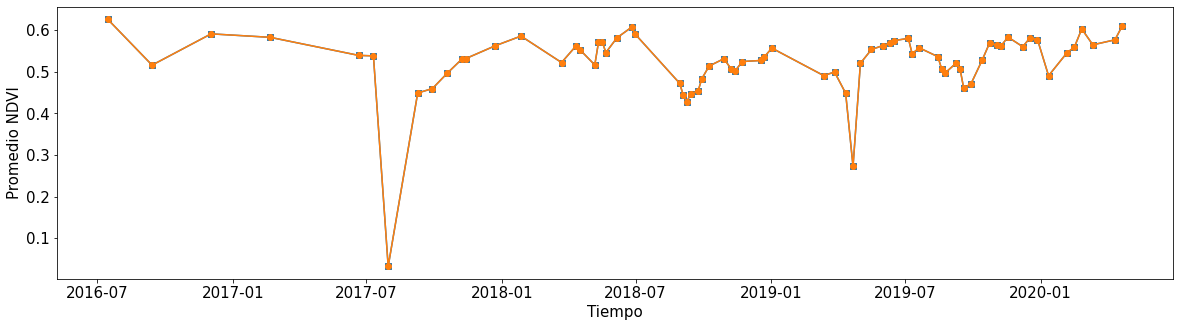

In [0]:
#Análisis temporal Lote 9
ndvi9=eop9_s2.data['NDVI']
mask=eop9_s2.mask['IS_DATA']
time=np.array(eop9_s2.timestamp)
t, w, h, _ = ndvi9.shape 

ndvi_clean = ndvi9.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi9.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 9 Text major ticklabel objects>)

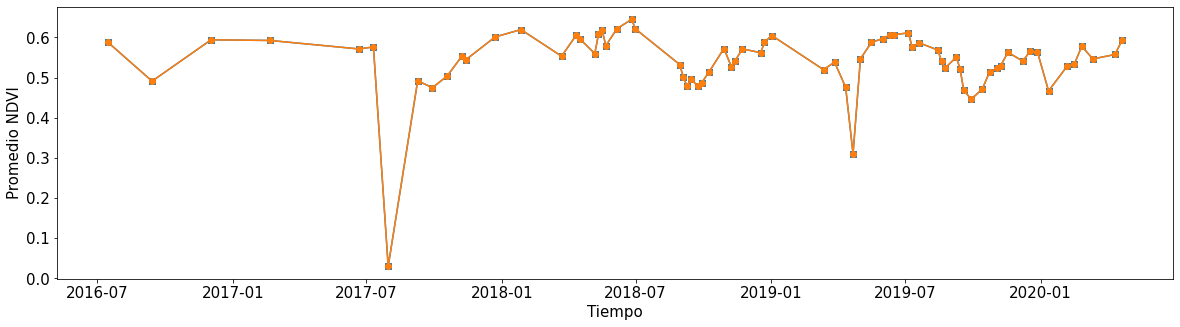

In [0]:
#Análisis temporal Lote 10
ndvi10=eop10_s2.data['NDVI']
mask=eop10_s2.mask['IS_DATA']
time=np.array(eop10_s2.timestamp)
t, w, h, _ = ndvi10.shape 

ndvi_clean = ndvi10.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi10.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

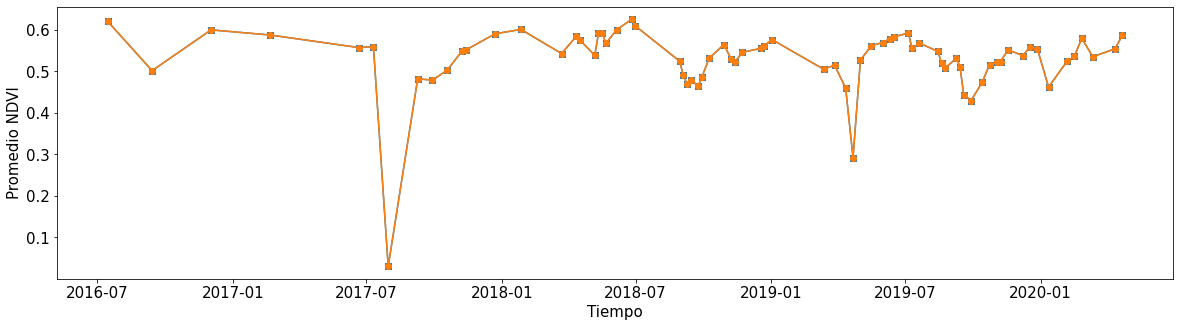

In [0]:
#Análisis temporal Lote 11
ndvi11=eop11_s2.data['NDVI']
mask=eop11_s2.mask['IS_DATA']
time=np.array(eop11_s2.timestamp)
t, w, h, _ = ndvi11.shape 

ndvi_clean = ndvi11.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi11.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 9 Text major ticklabel objects>)

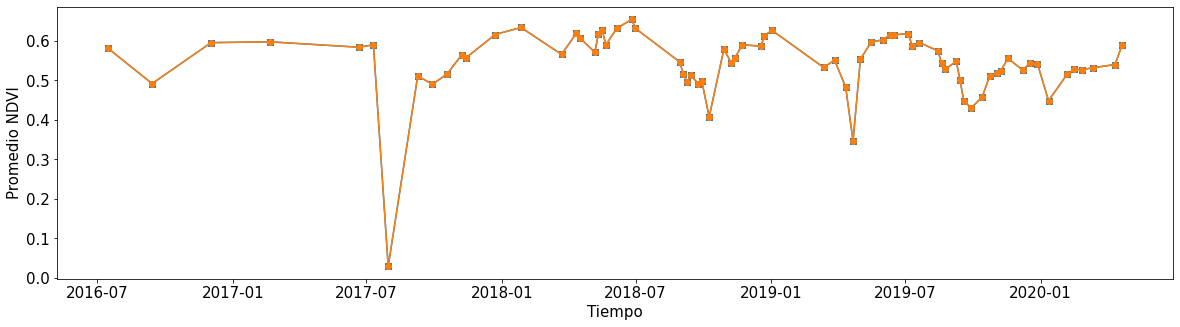

In [0]:
#Análisis temporal Lote 12
ndvi12=eop12_s2.data['NDVI']
mask=eop12_s2.mask['IS_DATA']
time=np.array(eop12_s2.timestamp)
t, w, h, _ = ndvi12.shape 

ndvi_clean = ndvi12.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi12.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

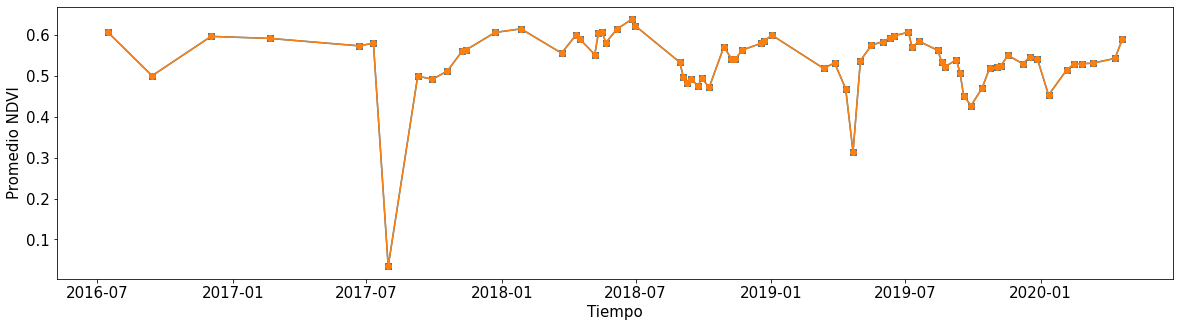

In [0]:
#Análisis temporal Lote 13
ndvi13=eop13_s2.data['NDVI']
mask=eop13_s2.mask['IS_DATA']
time=np.array(eop13_s2.timestamp)
t, w, h, _ = ndvi13.shape 

ndvi_clean = ndvi13.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi13.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

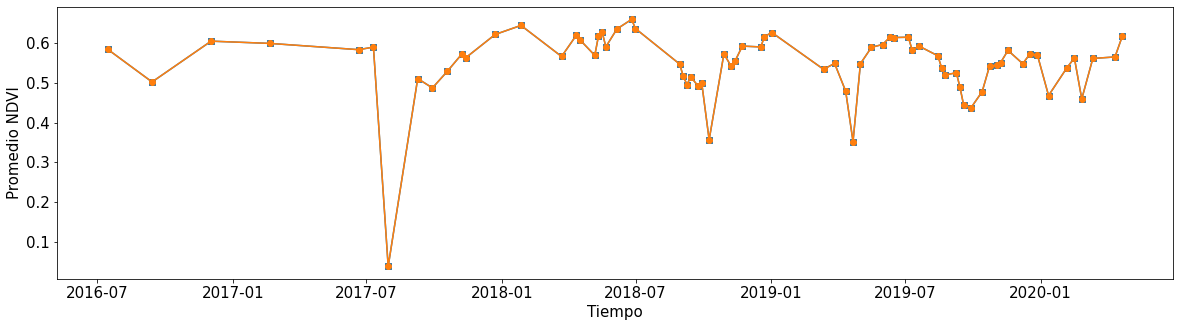

In [0]:
#Análisis temporal Lote 14
ndvi14=eop14_s2.data['NDVI']
mask=eop14_s2.mask['IS_DATA']
time=np.array(eop14_s2.timestamp)
t, w, h, _ = ndvi14.shape 

ndvi_clean = ndvi14.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi14.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

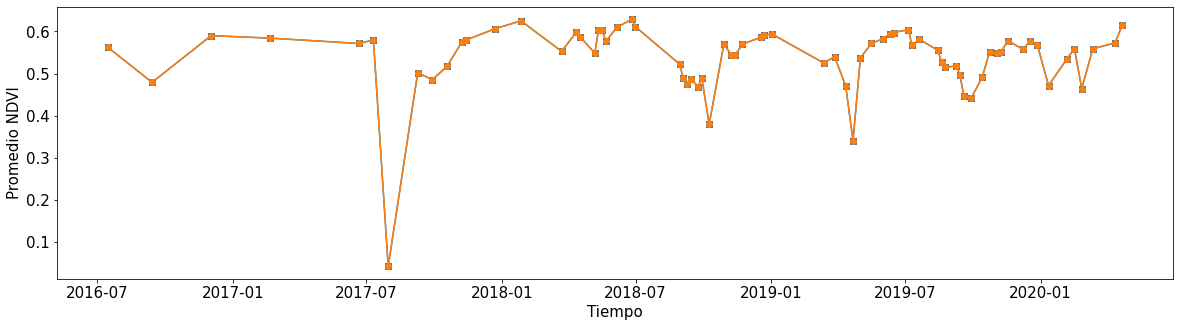

In [0]:
#Análisis temporal Lote 15
ndvi15=eop15_s2.data['NDVI']
mask=eop15_s2.mask['IS_DATA']
time=np.array(eop15_s2.timestamp)
t, w, h, _ = ndvi15.shape 

ndvi_clean = ndvi15.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi15.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

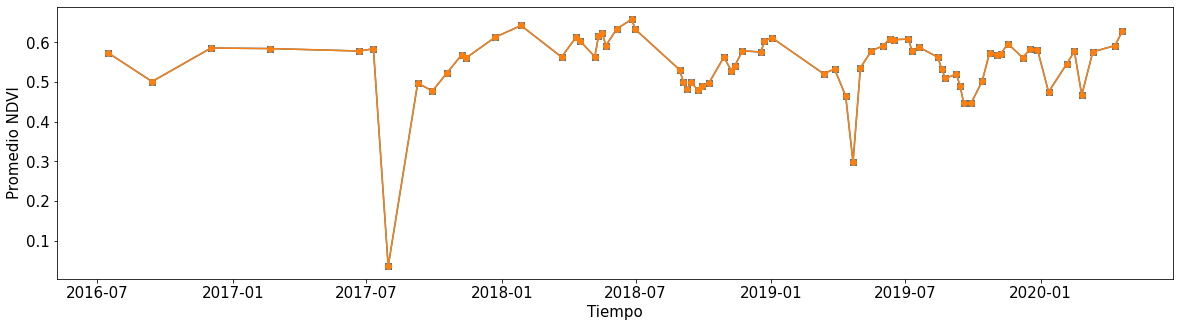

In [0]:
#Análisis temporal Lote 16
ndvi16=eop16_s2.data['NDVI']
mask=eop16_s2.mask['IS_DATA']
time=np.array(eop16_s2.timestamp)
t, w, h, _ = ndvi16.shape 

ndvi_clean = ndvi16.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi16.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

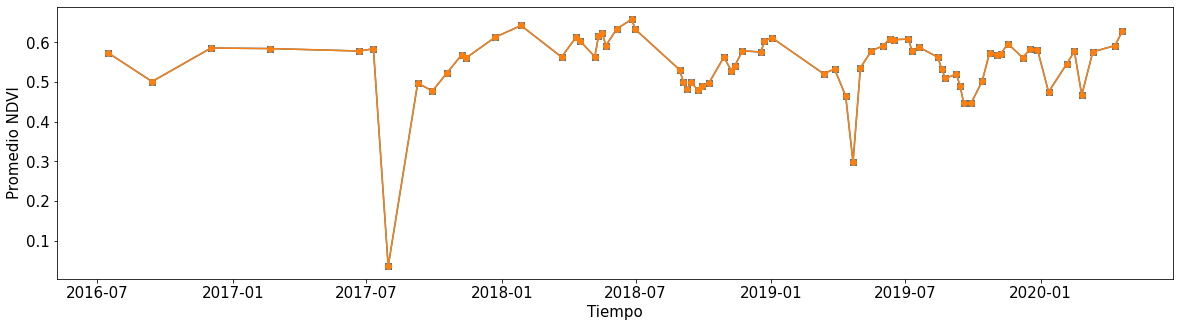

In [0]:
#Análisis temporal Lote 16
ndvi16=eop16_s2.data['NDVI']
mask=eop16_s2.mask['IS_DATA']
time=np.array(eop16_s2.timestamp)
t, w, h, _ = ndvi16.shape 

ndvi_clean = ndvi16.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi16.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

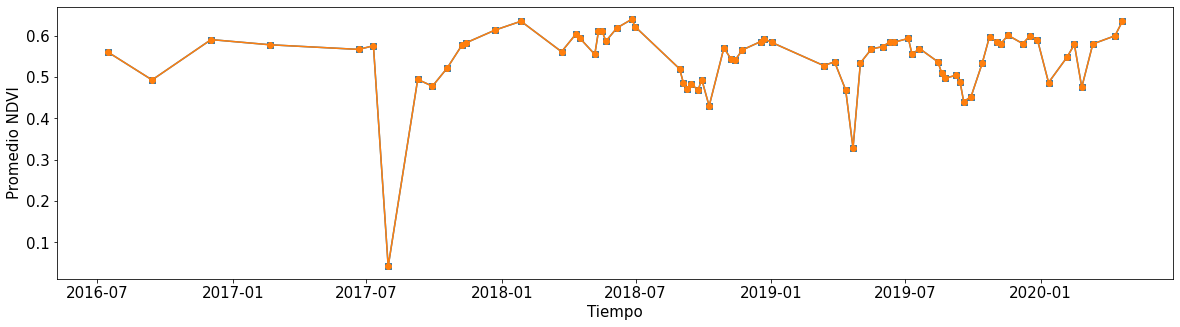

In [0]:
#Análisis temporal Lote 17
ndvi17=eop17_s2.data['NDVI']
mask=eop17_s2.mask['IS_DATA']
time=np.array(eop17_s2.timestamp)
t, w, h, _ = ndvi17.shape 

ndvi_clean = ndvi17.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi17.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 9 Text major ticklabel objects>)

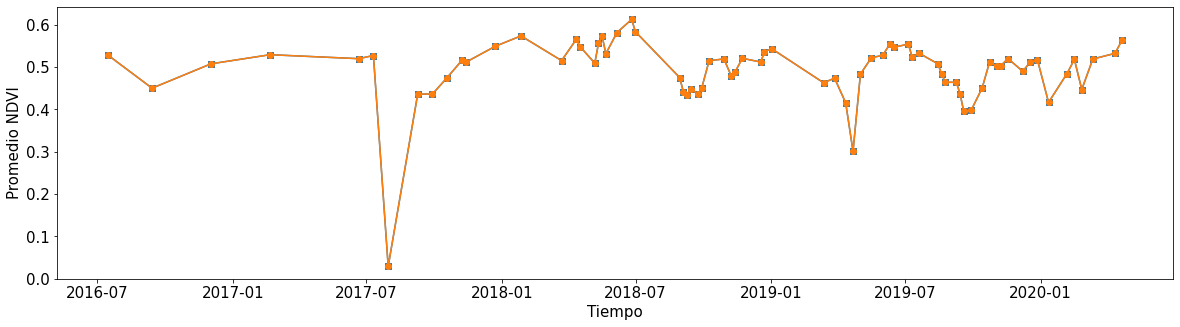

In [0]:
#Análisis temporal Lote 18
ndvi18=eop18_s2.data['NDVI']
mask=eop18_s2.mask['IS_DATA']
time=np.array(eop18_s2.timestamp)
t, w, h, _ = ndvi18.shape 

ndvi_clean = ndvi18.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi18.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

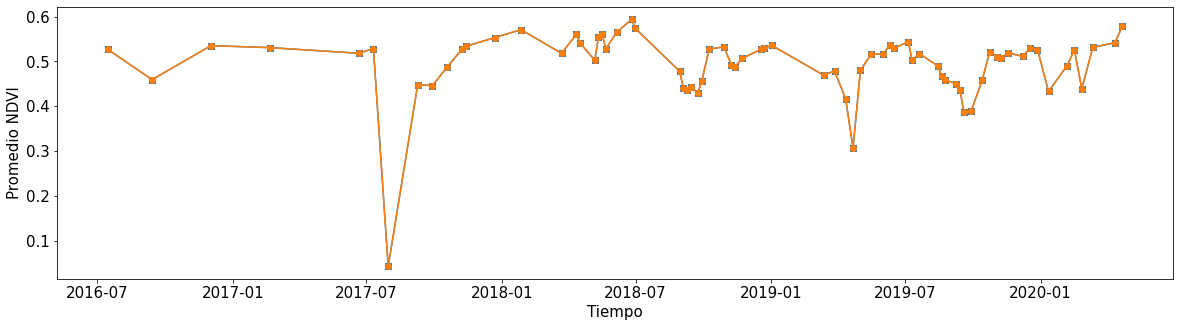

In [0]:
#Análisis temporal Lote 19
ndvi19=eop19_s2.data['NDVI']
mask=eop19_s2.mask['IS_DATA']
time=np.array(eop19_s2.timestamp)
t, w, h, _ = ndvi19.shape 

ndvi_clean = ndvi19.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi19.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text major ticklabel objects>)

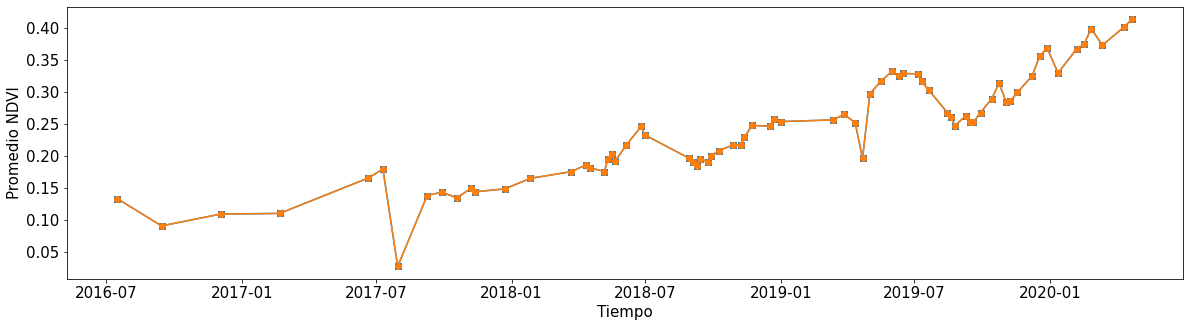

In [0]:
#Análisis temporal Lote 20
ndvi20=eop20_s2.data['NDVI']
mask=eop20_s2.mask['IS_DATA']
time=np.array(eop20_s2.timestamp)
t, w, h, _ = ndvi20.shape 

ndvi_clean = ndvi20.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi20.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text major ticklabel objects>)

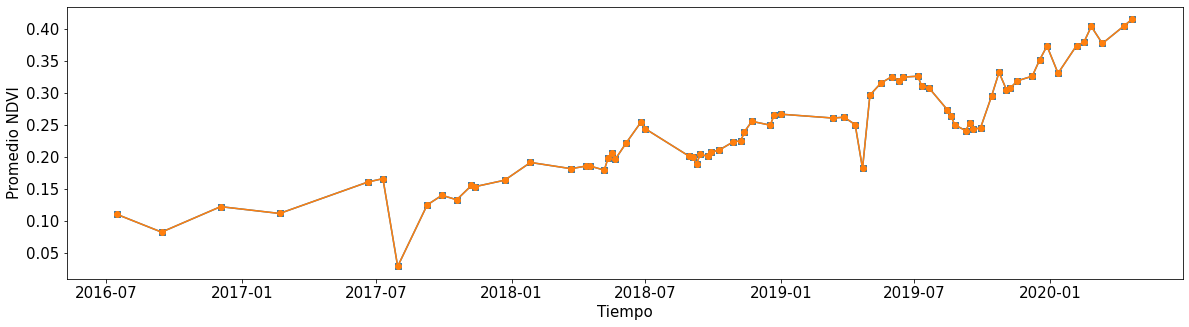

In [0]:
#Análisis temporal Lote 21
ndvi21=eop21_s2.data['NDVI']
mask=eop21_s2.mask['IS_DATA']
time=np.array(eop21_s2.timestamp)
t, w, h, _ = ndvi21.shape 

ndvi_clean = ndvi21.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi21.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 <a list of 6 Text major ticklabel objects>)

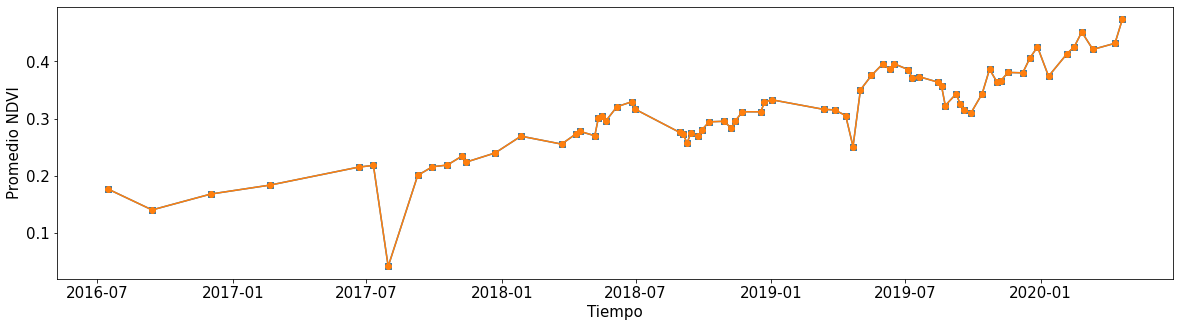

In [0]:
#Análisis temporal Lote 22
ndvi22=eop22_s2.data['NDVI']
mask=eop22_s2.mask['IS_DATA']
time=np.array(eop22_s2.timestamp)
t, w, h, _ = ndvi22.shape 

ndvi_clean = ndvi22.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi22.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 <a list of 6 Text major ticklabel objects>)

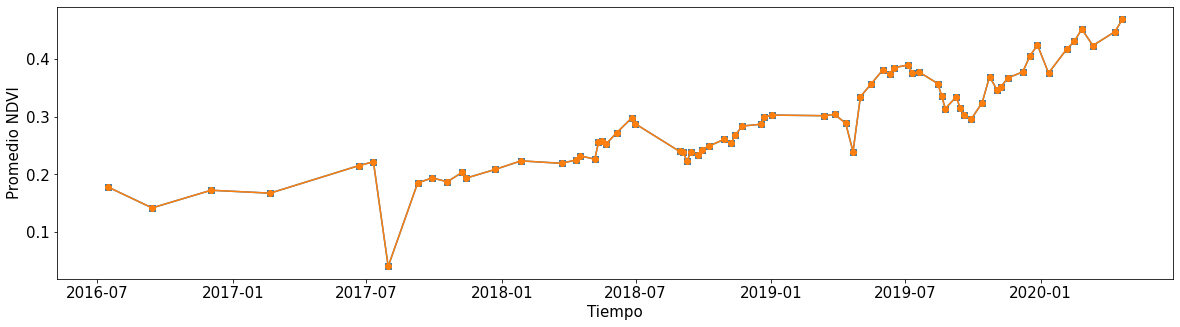

In [0]:
#Análisis temporal Lote 23
ndvi23=eop23_s2.data['NDVI']
mask=eop23_s2.mask['IS_DATA']
time=np.array(eop23_s2.timestamp)
t, w, h, _ = ndvi23.shape 

ndvi_clean = ndvi23.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi23.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text major ticklabel objects>)

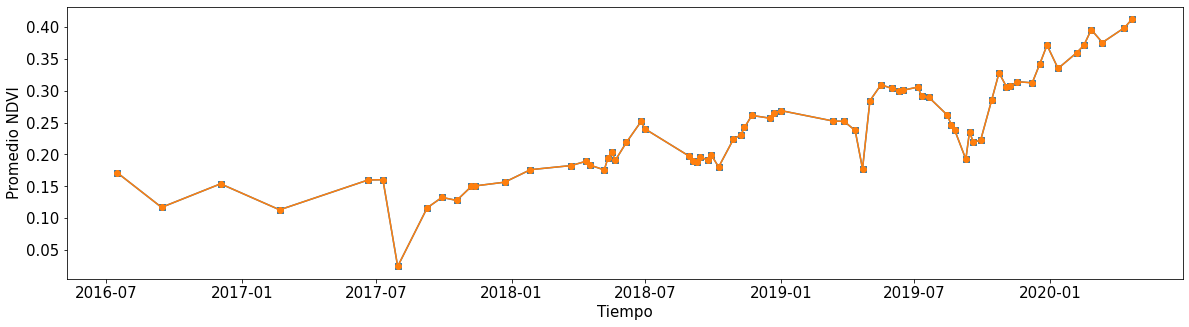

In [0]:
#Análisis temporal Lote 24
ndvi24=eop24_s2.data['NDVI']
mask=eop24_s2.mask['IS_DATA']
time=np.array(eop24_s2.timestamp)
t, w, h, _ = ndvi24.shape 

ndvi_clean = ndvi24.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi24.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 <a list of 8 Text major ticklabel objects>)

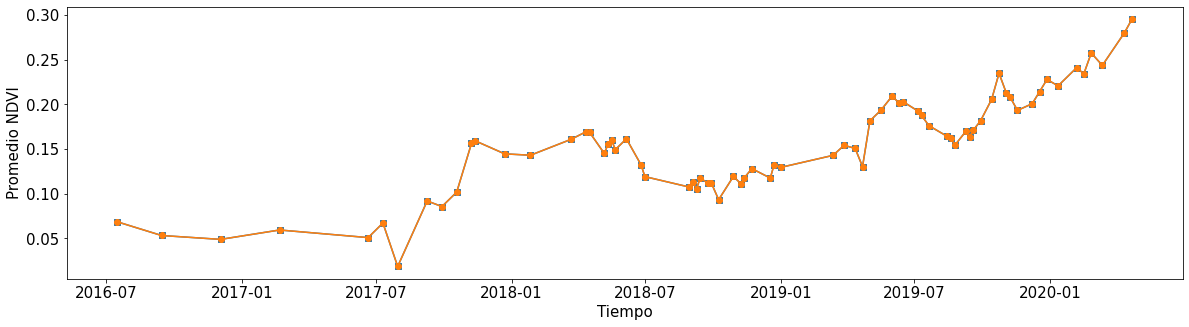

In [0]:
#Análisis temporal Lote 25
ndvi25=eop25_s2.data['NDVI']
mask=eop25_s2.mask['IS_DATA']
time=np.array(eop25_s2.timestamp)
t, w, h, _ = ndvi25.shape 

ndvi_clean = ndvi25.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi25.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 <a list of 8 Text major ticklabel objects>)

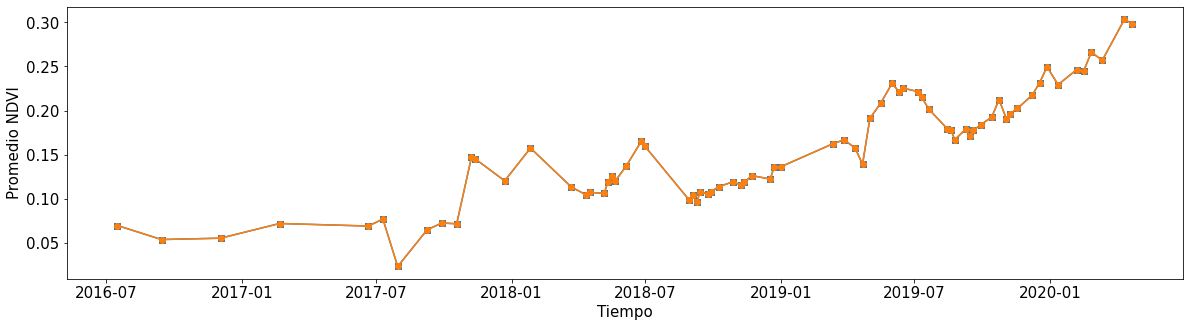

In [0]:
#Análisis temporal Lote 26
ndvi26=eop26_s2.data['NDVI']
mask=eop26_s2.mask['IS_DATA']
time=np.array(eop26_s2.timestamp)
t, w, h, _ = ndvi26.shape 

ndvi_clean = ndvi26.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi26.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 <a list of 8 Text major ticklabel objects>)

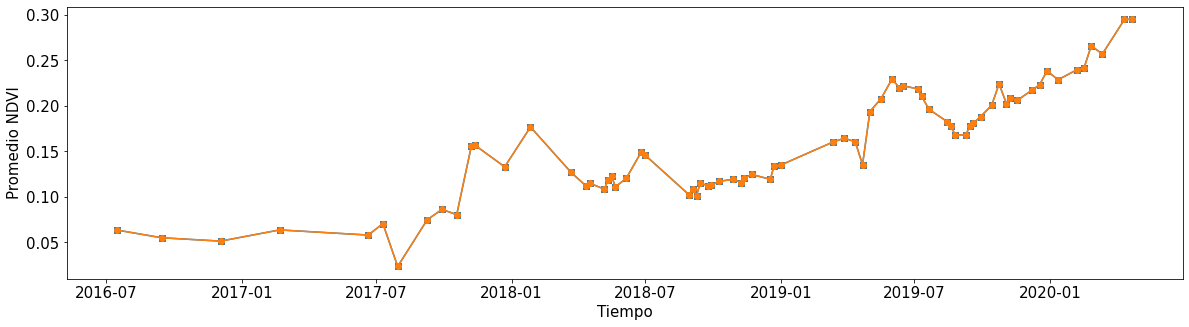

In [0]:
#Análisis temporal Lote 27
ndvi27=eop27_s2.data['NDVI']
mask=eop27_s2.mask['IS_DATA']
time=np.array(eop27_s2.timestamp)
t, w, h, _ = ndvi27.shape 

ndvi_clean = ndvi27.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi27.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

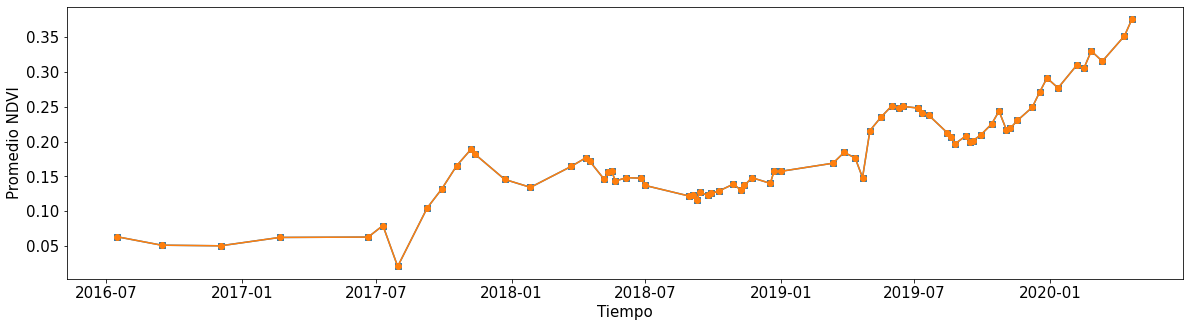

In [0]:
#Análisis temporal Lote 28
ndvi28=eop28_s2.data['NDVI']
mask=eop28_s2.mask['IS_DATA']
time=np.array(eop28_s2.timestamp)
t, w, h, _ = ndvi28.shape 

ndvi_clean = ndvi28.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi28.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text major ticklabel objects>)

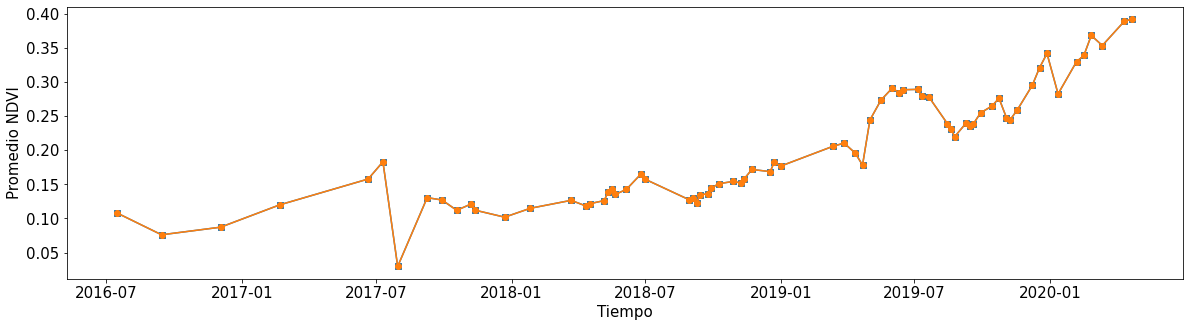

In [0]:
#Análisis temporal Lote 29
ndvi29=eop29_s2.data['NDVI']
mask=eop29_s2.mask['IS_DATA']
time=np.array(eop29_s2.timestamp)
t, w, h, _ = ndvi29.shape 

ndvi_clean = ndvi29.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi29.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

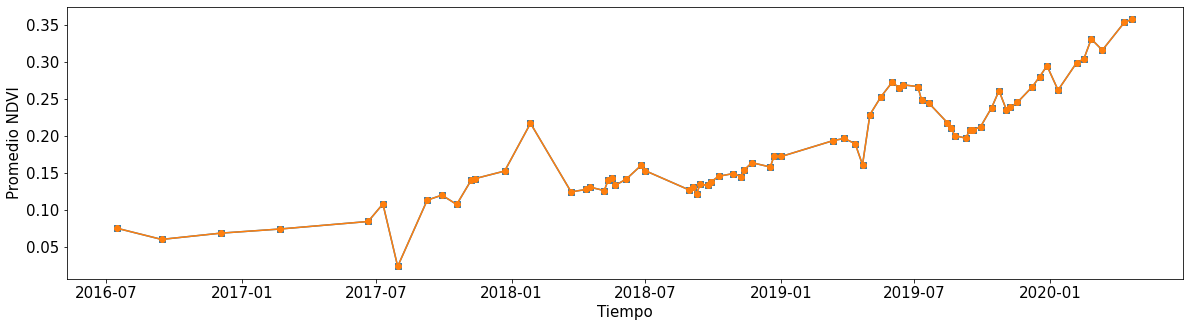

In [0]:
#Análisis temporal Lote 30
ndvi30=eop30_s2.data['NDVI']
mask=eop30_s2.mask['IS_DATA']
time=np.array(eop30_s2.timestamp)
t, w, h, _ = ndvi30.shape 

ndvi_clean = ndvi30.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi30.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

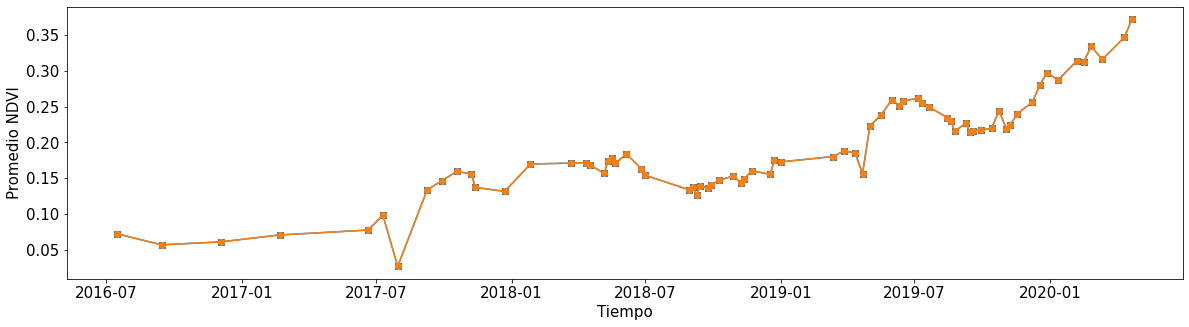

In [0]:
#Análisis temporal Lote 31
ndvi31=eop31_s2.data['NDVI']
mask=eop31_s2.mask['IS_DATA']
time=np.array(eop31_s2.timestamp)
t, w, h, _ = ndvi31.shape 

ndvi_clean = ndvi31.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi31.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <a list of 11 Text major ticklabel objects>)

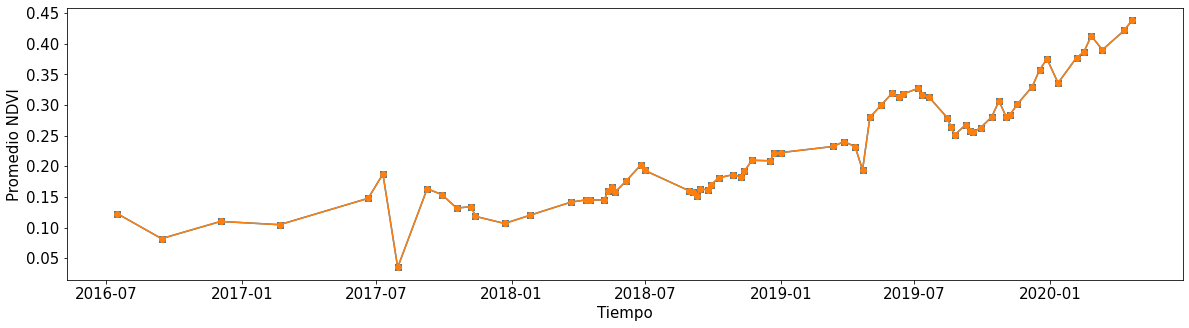

In [0]:
#Análisis temporal Lote 32
ndvi32=eop32_s2.data['NDVI']
mask=eop32_s2.mask['IS_DATA']
time=np.array(eop32_s2.timestamp)
t, w, h, _ = ndvi32.shape 

ndvi_clean = ndvi32.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi32.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

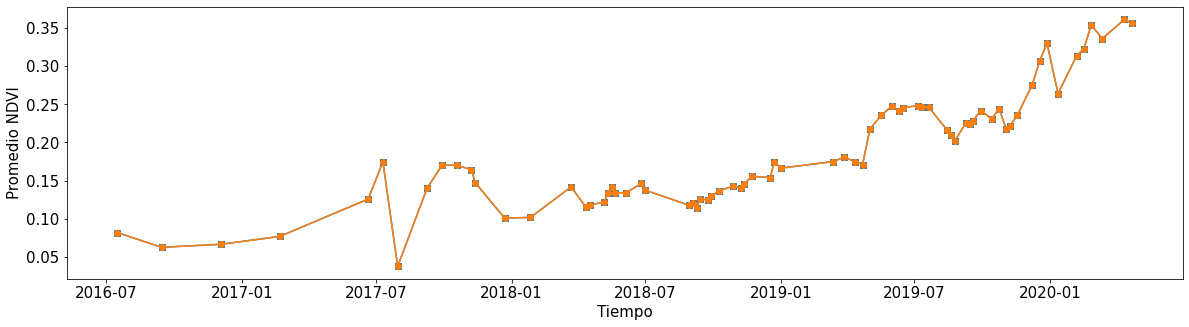

In [0]:
#Análisis temporal Lote 33
ndvi33=eop33_s2.data['NDVI']
mask=eop33_s2.mask['IS_DATA']
time=np.array(eop33_s2.timestamp)
t, w, h, _ = ndvi33.shape 

ndvi_clean = ndvi33.copy()
ndvi_clean[~mask] = np.nan # set values of invalid pixels to NaN'

ndvi_mean = np.nanmean(ndvi33.reshape(t, w * h).squeeze(), axis=1) 
ndvi_mean_clean = np.nanmean(ndvi_clean.reshape(t, w * h).squeeze(), axis=1)
time_clean = time[~np.isnan(ndvi_mean_clean)]
ndvi_mean_clean = ndvi_mean_clean[~np.isnan(ndvi_mean_clean)]

fig = plt.figure(figsize=(20,5))
plt.plot(time_clean, ndvi_mean_clean, 's-', label = 'Promedio NDVI con limpieza de nubes')
plt.plot(time, ndvi_mean, 'o-', label='Promedio NDVI sin limpieza de nubes')
plt.xlabel('Tiempo', fontsize=15)
plt.ylabel('Promedio NDVI', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

##ANALISIS 

Se puede notar que para los lotes del 1 al 19 el NDVI presenta similares valores con un peak cercano a 0.6. En particular para julio de 2017 se presento un descenso significativo en el NDVI lo que posiblemente esté relacionado con que los lotes estuvieron sin siembra alguna (inactividad, año de sequía, etc??). Un descenso significativo ocurre en el año 2019 para los meses de abril con un valor de 0.3. 

Luego, los lotes del 20 al 28 presentan distinto comportamientos a sus antecesores lotes. En particular se puede apreciar que prácticamente desde el año 2016 a julio de 2017, los lotes presentan muy bajo indice (>0.2) el que puede ser relacionado con inactividad o loteo no trabajado para entonces. Desde julio de 2019 en adelante el NDVI aumenta levemente hasta alcanzar un peak de 0.35 en abril de 2020. Estos aumento pueden deberse a que los loteos comenzaron a trabajarse inyectando sistemas de riego, plantación, etc. 
